In [1]:
import tensorflow as tf

In [2]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16943846678638338005
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2254123828
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3691402615321364206
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [3]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input,decode_predictions
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os 

In [4]:
train_path = 'G:\\PYTHON\\Final year project\\Dataset\\train'
val_path = 'G:\\PYTHON\\Final year project\\Dataset\\val'
test_path = 'G:\\PYTHON\\Final year project\\Dataset\\test'
#test_path= test_data

In [20]:
# re-size all the images to a size VGG-16 expects.
IMAGE_SIZE = [224, 224]

# Set the batch size
BATCH_SIZE = 8  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS = 5
LEARNING_RATE = 0.0001
NUM_CLASSES = 2 # We are aware of it.

In [21]:
CLASSES = os.listdir(train_path)
NUM_CLASSES = len(CLASSES)
print("Class --> {} \n and the length is : {}".format(CLASSES, NUM_CLASSES))

Class --> ['covid', 'normal'] 
 and the length is : 2


In [22]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [23]:
# Import the images from the train dataset.
# Make sure to provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(
    directory = train_path,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 6030 images belonging to 2 classes.


In [24]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [25]:
# Import the images from the test dataset.

test_set = test_datagen.flow_from_directory(
    directory = test_path,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 860 images belonging to 2 classes.


In [26]:
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [27]:
for layer in vgg.layers:
    layer.trainable = False

In [28]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

prediction = Dense(NUM_CLASSES, activation='softmax')(x)

In [29]:
model = Model(inputs=vgg.input, outputs=prediction)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [31]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
!pip install scipy

In [17]:
from tensorflow.python.keras.callbacks import TensorBoard
from time import time

In [30]:
Tensorboard = TensorBoard(log_dir="G:\\PYTHON\\Final year project\\Logs\\{}".format(time()))

Epoch 1/20
754/754 [==============================] - 267s 340ms/step - loss: 0.3776 - accuracy: 0.8592 - val_loss: 0.4819 - val_accuracy: 0.8163
Epoch 2/20
754/754 [==============================] - 101s 133ms/step - loss: 0.2566 - accuracy: 0.9129 - val_loss: 0.7110 - val_accuracy: 0.7872
Epoch 3/20
754/754 [==============================] - 107s 141ms/step - loss: 0.2380 - accuracy: 0.9163 - val_loss: 0.3641 - val_accuracy: 0.8628
Epoch 4/20
754/754 [==============================] - 114s 150ms/step - loss: 0.2104 - accuracy: 0.9295 - val_loss: 0.3298 - val_accuracy: 0.8721
Epoch 5/20
754/754 [==============================] - 118s 156ms/step - loss: 0.2298 - accuracy: 0.9249 - val_loss: 0.4555 - val_accuracy: 0.8547
Epoch 6/20
754/754 [==============================] - 158s 210ms/step - loss: 0.1911 - accuracy: 0.9380 - val_loss: 0.4033 - val_accuracy: 0.8558
Epoch 7/20
754/754 [==============================] - 219s 291ms/step - loss: 0.1831 - accuracy: 0.9418 - val_loss: 0.4899 -

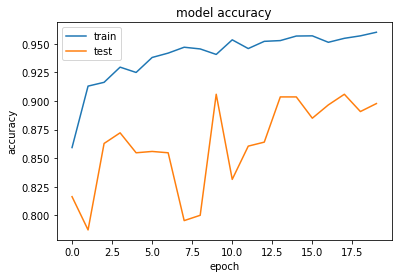

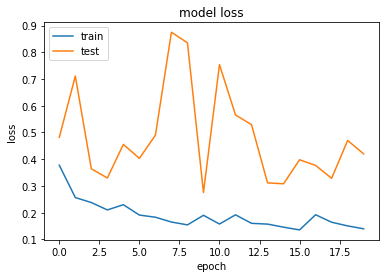

1h 27min 45s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [32]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    history = model.fit(
        training_set,
        validation_data=test_set,
        epochs=20,
        steps_per_epoch=len(training_set),
        validation_steps=len(test_set),
        callbacks=[Tensorboard]
    )
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [42]:
%load_ext tensorboard
%tensorboard --logdir G:/PYTHON/Final year project/Logs/1633424229.3812594

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}]
                   [--grpc_data_provider PORT] [--purge_orphaned_data BOOL]
                   [--db URI] [--db_import] [--inspect] [--version_tb]
                   [--tag TAG] [--event_file PATH] [--path_prefix PATH]
                   [--window_title TEXT] [--max_reload_threads COUNT]
                   [--reload_interval SECONDS] [--reload_task TYPE]
                   [--reload_multifile BOOL]
                   [--reload_multifile_inactive_secs SECONDS]
                   [--generic_data TYPE]
                   [--samples_per_plugin SAMPLES_PER_PLUGIN]
                   [-

In [34]:
model.save("G:\\PYTHON\\Final year project\\weights\\vgg_16_weights_1.h5")

In [17]:
model.load_weights("G:\\PYTHON\\Final year project\\weights\\vgg_16_weights.h5")

In [35]:
validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_set = validation_datagen.flow_from_directory(
    directory = val_path,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 1726 images belonging to 2 classes.


In [36]:
validation_steps = 200

loss0,accuracy0 = model.evaluate(validation_set, steps = validation_steps)

print("loss: {:.2f}".format(loss0))
print("accuracy: {:.2f}".format(accuracy0))

200/200 [==============================] - 26s 132ms/step - loss: 0.2473 - accuracy: 0.9375
loss: 0.25
accuracy: 0.94


In [37]:
# Generate Validation set.
validation_set2 = validation_datagen.flow_from_directory(
    directory = val_path,
    target_size = (224, 224),
    batch_size = 1,
    shuffle=False, 
    seed=42, 
    class_mode="binary"
)

# validation_set2.reset()

Found 1726 images belonging to 2 classes.


In [38]:
# just capture the loss and accuray into val variable... unlike in pervious code to capture into loss0 and accuracy0. Just to showcase alternate way.

test = model.evaluate(test_set)

print("loss: {:.2f}".format(test[0]))
print("accuracy: {:.2f}".format(test[1]))

108/108 [==============================] - 10s 91ms/step - loss: 0.4201 - accuracy: 0.8977
loss: 0.42
accuracy: 0.90


In [34]:
# get sample image to test.
img_covid = 'G:\\PYTHON\\Final year project\\Dataset\\COVID-19_Radiography_Dataset\\COVID\\COVID-60.png'
img_normal = 'G:\\PYTHON\\Final year project\\Dataset\\COVID-19_Radiography_Dataset\\Normal\\Normal-83.png'

normal


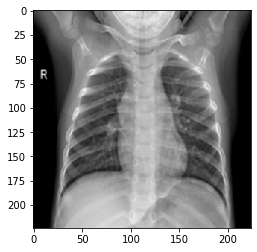

In [35]:
img_covid = 'G:\\PYTHON\\Final year project\\Dataset\\COVID-19_Radiography_Dataset\\COVID\\COVID-40.png'
img = image.load_img(img_normal,target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img,axis=0)

from keras.models import load_model

saved_model = load_model("G:\\PYTHON\\Final year project\\weights\\vgg_16_weights.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("covid")
else:
    print("normal")

In [38]:
def model_predict(img, actual):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x_processed = preprocess_input(x)
    result = model.predict(x_processed)
    print(result)
    if(result[0][0]<.50):
        result="normal"
    else:
        result="corona positive"
        
    plt.figure()
    plt.imshow(img)
    plt.title('Actual : {} --> Predicted  : {}'.format(actual, result))

[[1. 0.]]


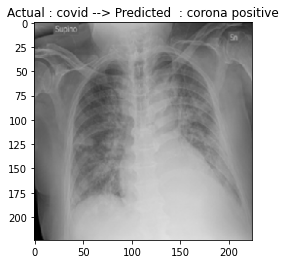

In [39]:
model_predict(img_covid,"covid")

[[1. 0.]]


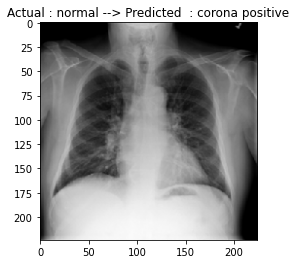

In [40]:
model_predict(img_normal,"normal")